Dataset Selection:

Data set Description described in another document “Drug Response Classification”

Task 1: Exploratory Data Analysis (EDA)

1.	Load the dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.


In [2]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report 


In [3]:
df = pd.read_csv('Pharma_Industry.csv')
df

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [4]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [6]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [7]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [8]:
array = df.values
X = array[:,0:5]
Y = array[:,5]

In [9]:
df.shape

(500, 6)

In [10]:
df.columns

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

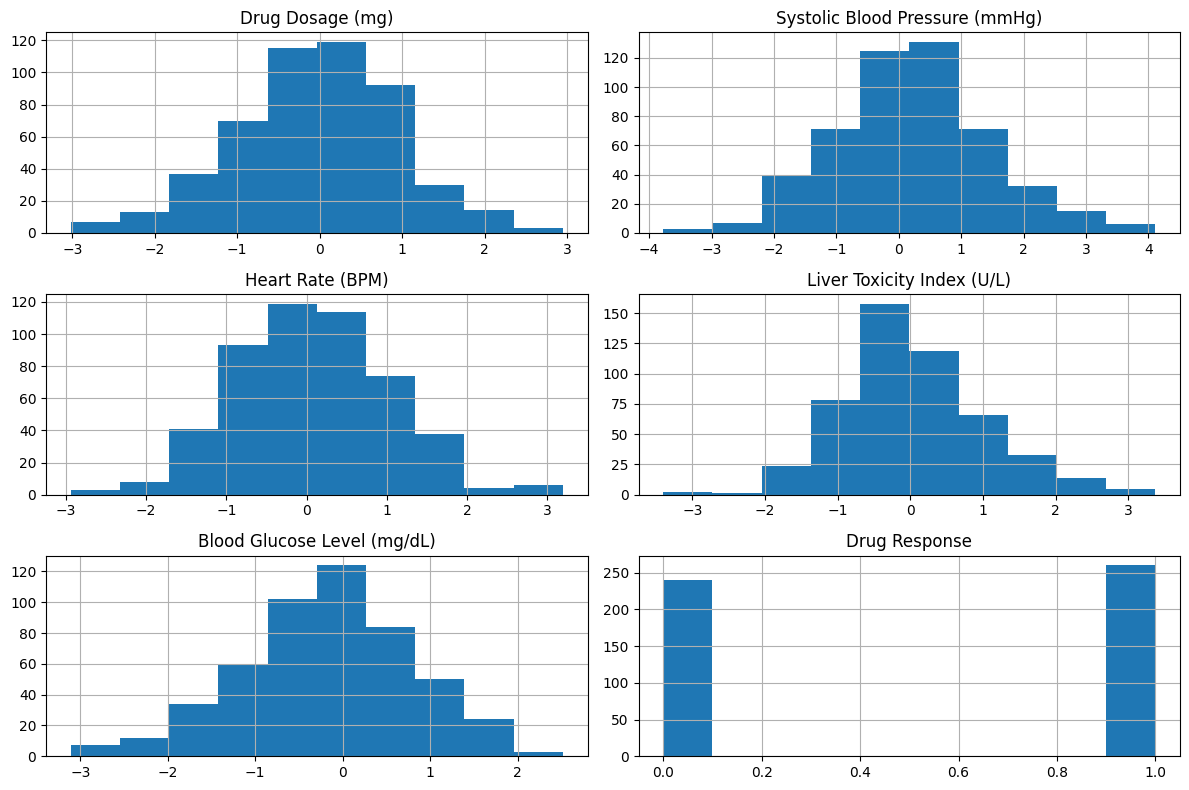

In [12]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

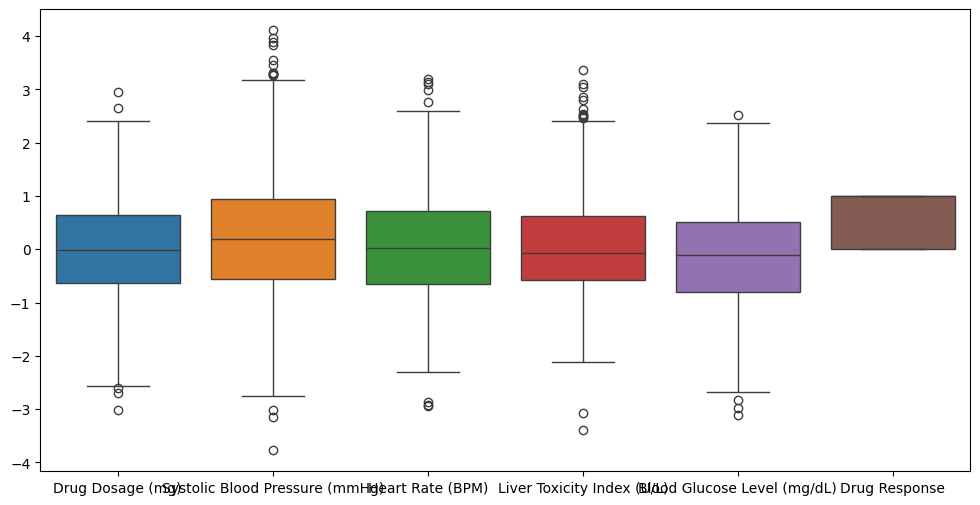

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.show()

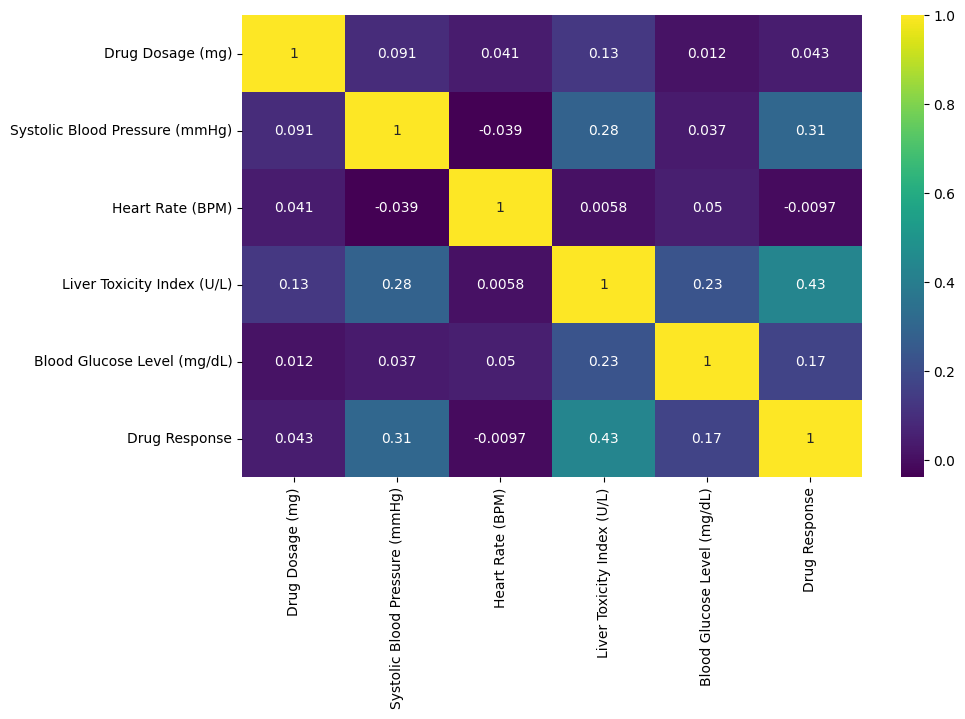

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.


In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder


In [62]:
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

In [18]:
X = df.drop('Liver Toxicity Index (U/L)', axis=1)
y = df['Liver Toxicity Index (U/L)']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state=42)

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((400, 5), (400,), (100, 5), (100,))

Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.


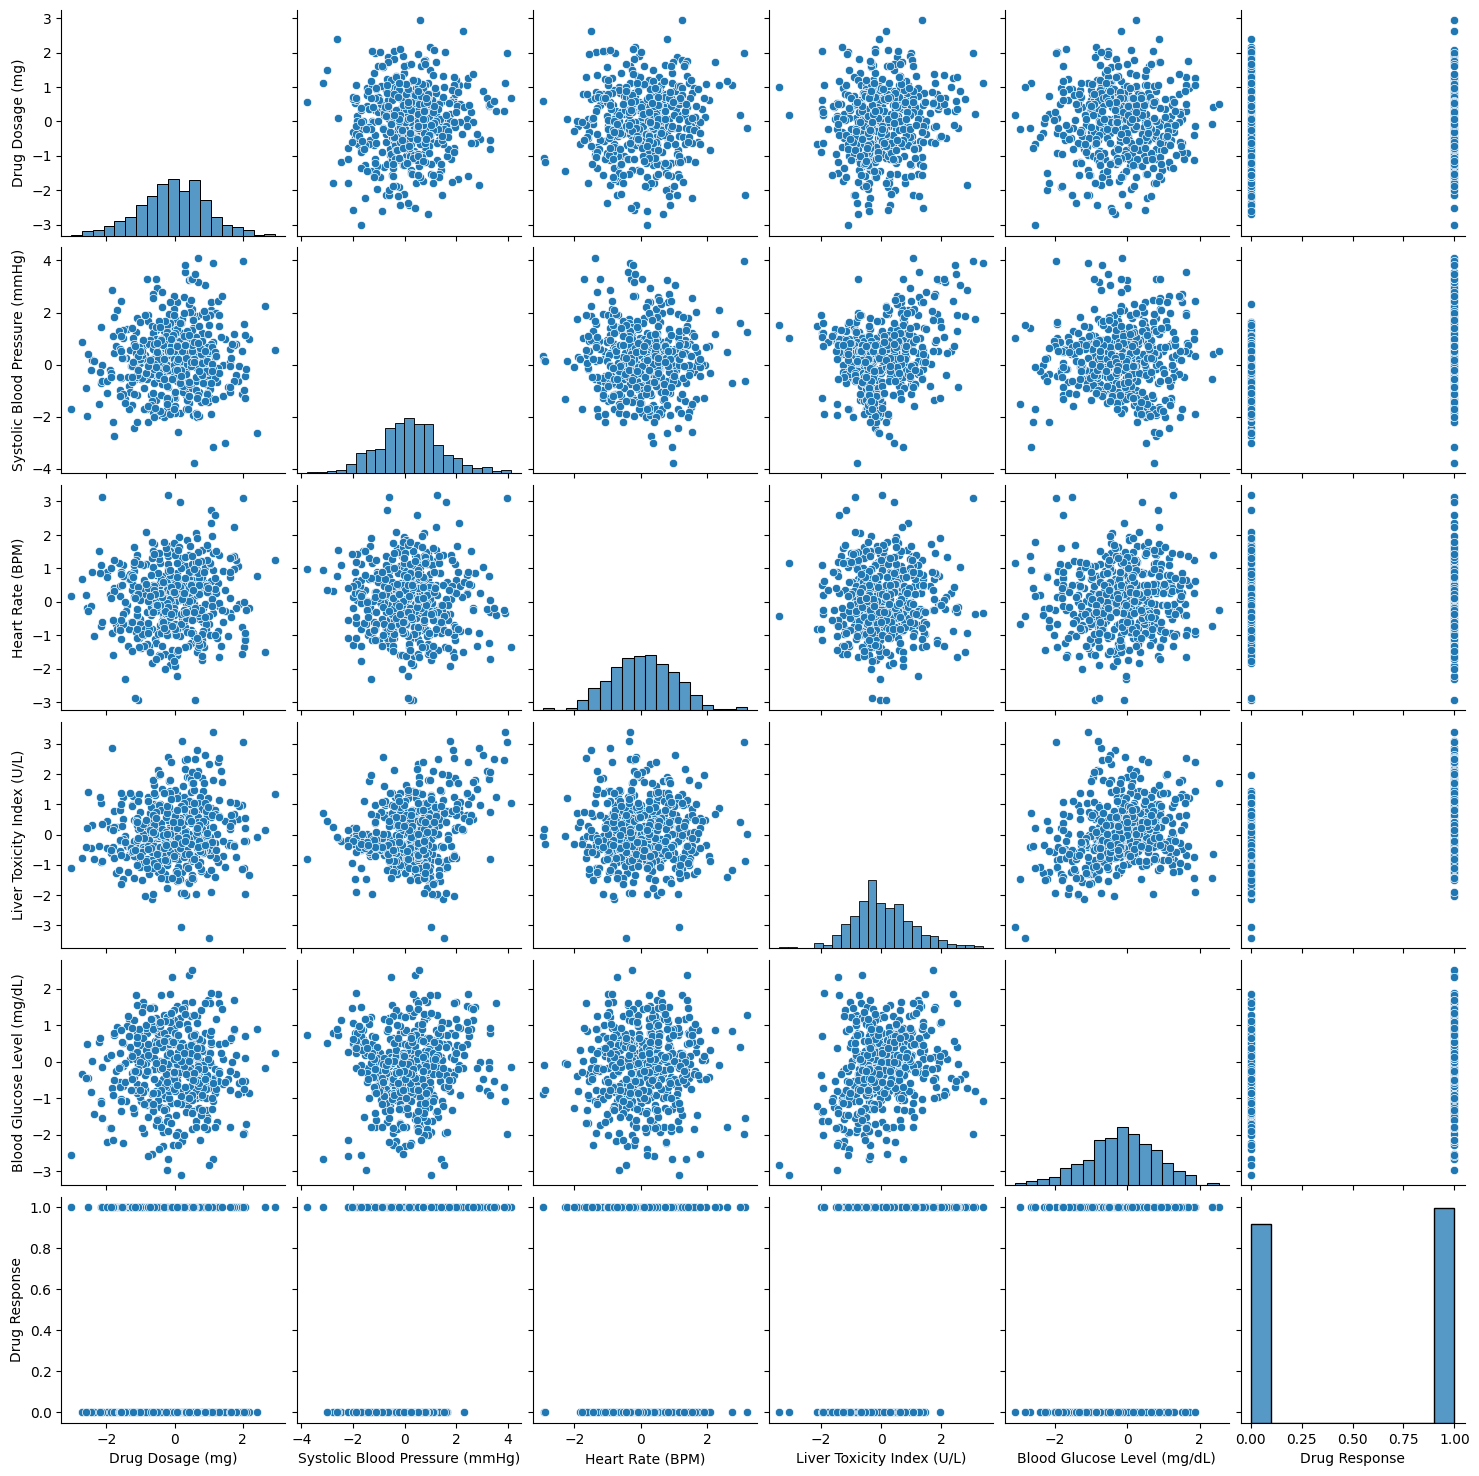

In [21]:
sns.pairplot(df)
plt.show()

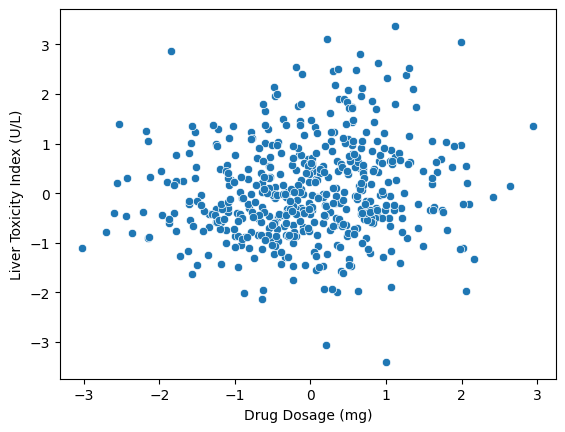

In [22]:
sns.scatterplot(x='Drug Dosage (mg)', y='Liver Toxicity Index (U/L)', data=df)
plt.show()

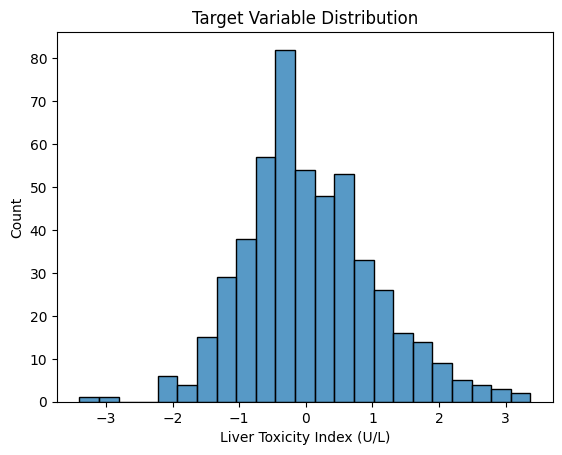

In [23]:
# Histogram of the target variable
sns.histplot(df['Liver Toxicity Index (U/L)'])
plt.title('Target Variable Distribution')
plt.show()


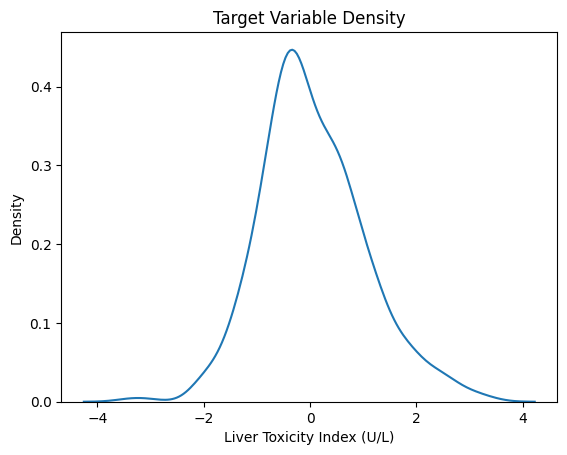

In [24]:

# Density plot of the target variable
sns.kdeplot(df['Liver Toxicity Index (U/L)'])
plt.title('Target Variable Density')
plt.show()

Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [25]:
# Assume binary classification (e.g., Liver Toxicity Index > threshold)
# For demonstration, let's use a threshold of 100
df['Target'] = (df['Liver Toxicity Index (U/L)'] > 100).astype(int)


In [26]:

X = df.drop(['Liver Toxicity Index (U/L)', 'Target'], axis=1)
y = df['Target']


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.svm import SVR


In [29]:

# Train SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)


,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [30]:

# Predict
y_pred = svr.predict(X_test)

In [31]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')


Accuracy: 1.000


In [32]:

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [33]:

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[100]]


c:\Users\PRINCE\python\python practise\.venv\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.


In [40]:
def plot_svr_results(X_test, y_test, y_pred):
   # Scatter plot of actual values
   plt.scatter(X_test['Drug Dosage (mg)'], X_test['Systolic Blood Pressure (mmHg)'], c=y_test, cmap='coolwarm', alpha=0.6)

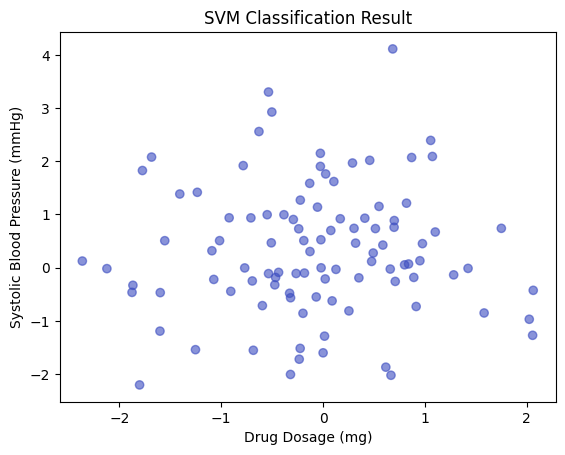

In [63]:
    
# Plot support vectors (optional)
# plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='black')
    
plt.xlabel('Drug Dosage (mg)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('SVM Classification Result')
plot_svr_results(X_test, y_test, y_pred)
plt.show()


Task 6: Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [43]:
# Separate features and target (assuming the last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [44]:

# Define svr and parameter grid
svr_model = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],  # regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # kernel type
    'epsilon':[0.01, 0.1, 0.5], #epsilon in loss function
    'gamma': ['scale', 'auto']  # kernel coefficient
}

In [45]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y) 


,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf', ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [46]:

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (neg MSE):", grid_search.best_score_)


Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (neg MSE): 0.0


In [47]:

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)


In [48]:
from sklearn.metrics import mean_squared_error,	r2_score

In [49]:

# Regression metrics
mse = mean_squared_error(y, y_pred)


In [50]:
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.0


In [51]:
r2 = r2_score(y, y_pred)


In [52]:

print(f"R² Score: {r2}")

R² Score: 1.0


Task 7: Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).



In [53]:
# Define SVR kernels to compare
kernels = ['linear', 'poly', 'rbf']


In [54]:

for kernel in kernels:
    # Create an SVR regressor with the current kernel
    svr = SVR(kernel=kernel, C=1, epsilon=0.1)


In [55]:
    
# Train the regressor
svr.fit(X_train, y_train)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [56]:
    
 # Predict on test data
y_pred = svr.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [58]:
print(f"Kernel: {kernel}, MSE: {mse:.3f}, R²: {r2:.3f}")
print()

Kernel: rbf, MSE: 0.000, R²: 1.000



2.Analyze SVM strengths & weaknesses (based on EDA & visualization)Typical SVM insights:

- Strengths: effective in high-dimensional spaces, works well with clear margin separation, versatile with kernels.

- Weaknesses: sensitive to noisy data & overlapping classes, computationally intensive for large datasets, requires careful scaling.

Link with EDA:

- If your data has linearly separable features, a linear kernel may suffice.

- If features are non-linear or complex, rbf or poly kernels perform better.

- Check for outliers – SVM can be affected by them.



3. Practical implications of SVM in real-world classification- Healthcare: disease diagnosis (e.g., cancer detection) where data may be high-dimensional.

- Finance: credit scoring or fraud detection, needing robust non-linear decision boundaries.

- Manufacturing: quality control with sensor data, where SVM can handle complex patterns.

- Tips: preprocess data (scaling, outlier removal), choose kernel based on data nature, tune C for bias-variance trade-off.